In [87]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt;import seaborn as sns

In [89]:
x = np.linspace(0.005, 0.01, 500000)

# Calculate the PDF (probability density function) for each x value
pdf = stats.beta.pdf(x=x, a=300, b=40000-300)

Text(0.5, 1.0, 'PDF for Beta(300, 39700)')

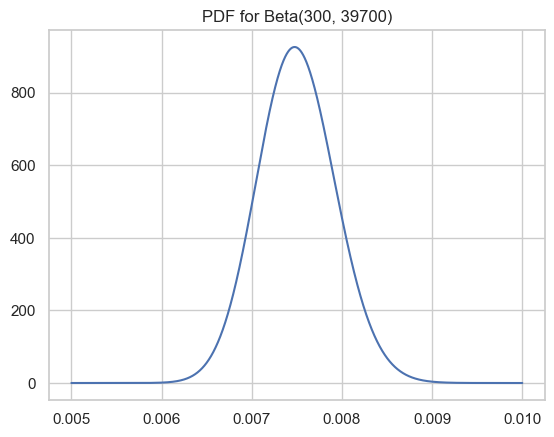

In [90]:
sns.lineplot(x=x, y=pdf)
plt.title("PDF for Beta(300, 39700)")

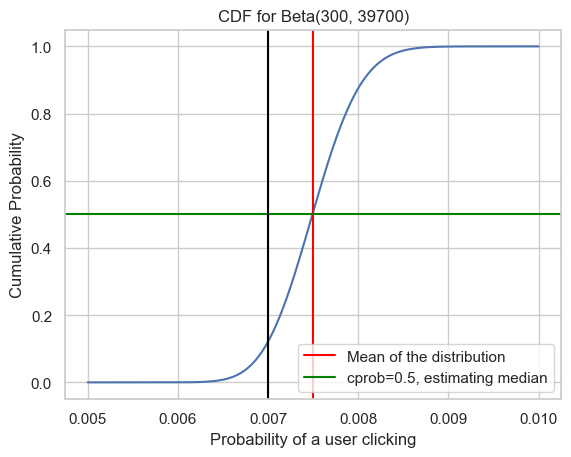

In [91]:
sns.lineplot(x=x, y=stats.beta.cdf(x=x, a=300, b=40000-300))
plt.title("CDF for Beta(300, 39700)")
plt.axvline(x=300/40000, c='red', label="Mean of the distribution")
plt.axhline(y=0.5, c="green" , label="cprob=0.5, estimating median")
plt.axvline(x=0.007, color="black")
plt.ylabel("Cumulative Probability")
plt.xlabel("Probability of a user clicking")
plt.grid(True, which="both")
plt.legend()

* The median is very close to the mean, the data is not skewed
* We can perform a kind of visual integration to quickly see the value of the true probability in a given range
    * So say we want to know an approximation of prob for a user clicking being between 0.007 and 0.0075 
    * Its about 0.4 i would guess from the cdf plot

In [92]:
# Lets verify 
stats.beta.cdf(x=0.0075, a=300, b=40000-300) # less than 0.0075
1 - stats.beta.cdf(x=0.007, a=300, b=40000-300) # more than 0.007

0.8782975508495494

In [93]:
# Parameters for the beta distribution
a = 300
b = 40000 - 300

# Compute the probability
x1 = 0.007
x2 = 0.0075
prob = stats.beta.cdf(x=x2, a=a, b=b) - stats.beta.cdf(x=x1, a=a, b=b)
prob

0.3858887185590041

In [94]:
# Probability that the true prob of user clicking is >= 0.0085
1-stats.beta.cdf(x=0.0085, a=300, b=40000-300)

0.012481510301036725

In [95]:
# Probability that the true prob of a user clicking is <=0.065
stats.beta.cdf(x=0.0065, a=300, b=40000-300)

0.007978686170755846

We can also visually estimate confidence intervals.
* Below a 80% confidence interval
* 80 % probability that the true value for the prob lies within this range

In [96]:
low_bound = stats.beta.ppf(0.1, a, b)
high_bound = stats.beta.ppf(0.9, a, b)

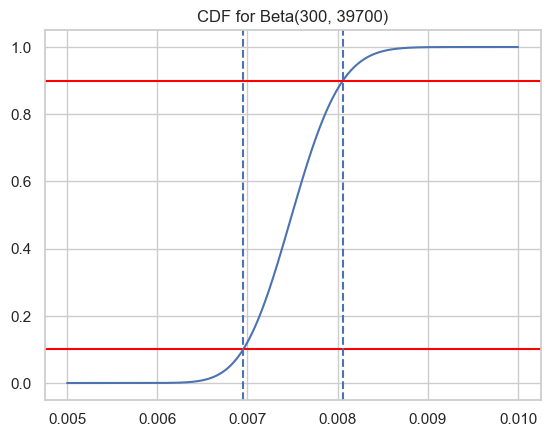

In [97]:
sns.lineplot(x=x, y=stats.beta.cdf(x=x, a=300, b=40000-300))
plt.title("CDF for Beta(300, 39700)")
plt.axhline(0.1, c="red")
plt.axhline(0.9, c ="red")
plt.axvline(low_bound, linestyle="--"); plt.axvline(high_bound, linestyle='--')

In [102]:
# using a cdf for a binomial dist

# intersted in rolling at lest 2 5's in 6 die rolls

die_rolls = 6
p_single_5 = 1 / 6

# this computes cumulative prob that we will have 1 or less 5's in 6 rolls
stats.binom.cdf(1, n=die_rolls, p=p_single_5)

0.736775548696845

In [100]:
# now we want 2 or more 5's in 6 rolls
1-stats.binom.cdf(1, n=die_rolls, p=p_single_5)

0.26322445130315497

In [104]:
x

array([0, 1, 2, 3, 4, 5, 6])

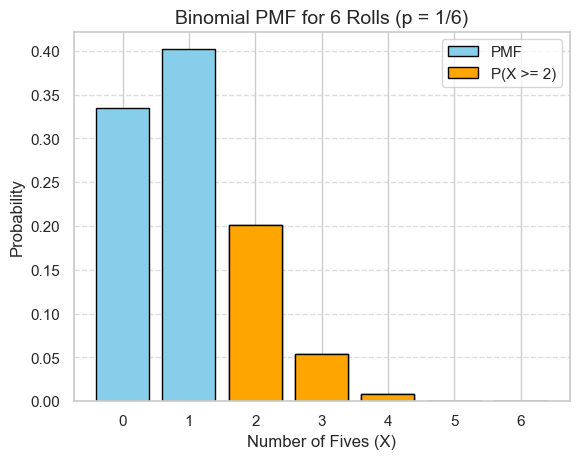

In [103]:
x = np.arange(0, die_rolls + 1)
pmf = stats.binom.pmf(x, n=die_rolls, p=p_single_5)

# Plot PMF
plt.bar(x, pmf, color="skyblue", edgecolor="black", label="PMF")
plt.bar(x[x >= 2], pmf[x >= 2], color="orange", edgecolor="black", label="P(X >= 2)")

# Labels and title
plt.xlabel("Number of Fives (X)", fontsize=12)
plt.ylabel("Probability", fontsize=12)
plt.title(f"Binomial PMF for {die_rolls} Rolls (p = 1/6)", fontsize=14)
plt.legend(loc="upper right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


In [111]:
stats.binom.cdf(80, n=10000, p=0.0075)

0.7417667690824861

In [113]:
stats.beta.ppf(q=0.999, a=a, b=b)

0.008903462119425339

In [114]:
# we can compute a 95 % interval
lower_bound = stats.beta.ppf(q=0.025, a=a, b=b)
upper_bound = stats.beta.ppf(q=0.975, a=a, b=b)

In [115]:
lower_bound

0.0066780740443999455

In [116]:
upper_bound

0.00836856236389098

Having a nice confidence interval (95%) is useful if we want to predict something:
* Say we expect to get a 100k visitors on the next day

In [118]:
print(f"We can expect between {round(100000*lower_bound)} and {round(100000*upper_bound)} of new subscribers!")

We can expect between 668 and 837 of new subscribers!


EXERCICES

In [ ]:
# 2 back on the snowfall example. 
snow_observations = np.array([7.8, 9.4, 10.0, 7.9, 9.4, 7.0, 7.0, 7.1, 8.9, 7.4])
# WE want a 99.9$% CI for the true value for snowfall

<Axes: ylabel='Count'>

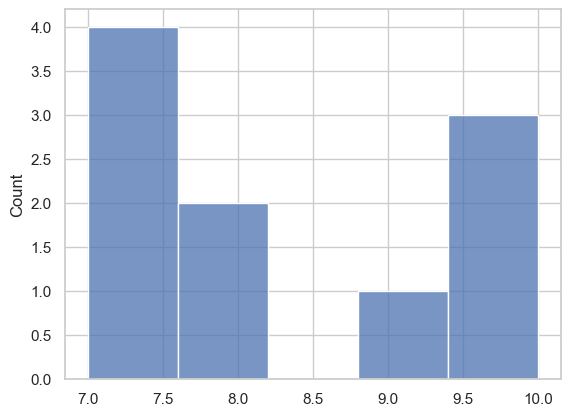

In [122]:
sns.histplot(snow_observations)

In [124]:
mean = snow_observations.mean()
std = snow_observations.std()

In [133]:
x=np.linspace(3, 20, 500)

In [134]:
pdf_norm = stats.norm.pdf(x, mean, std)

<Axes: >

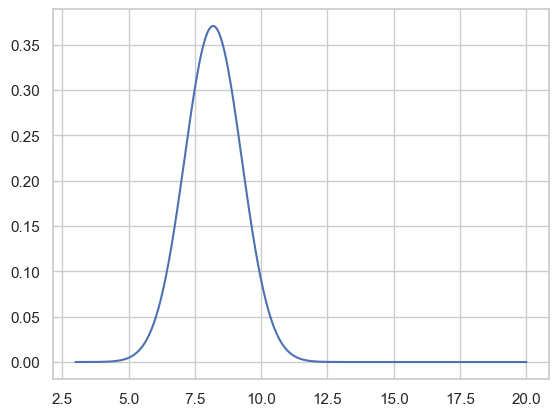

In [135]:
sns.lineplot(x=x, y=pdf_norm)

In [143]:
0.9995+0.0005

1.0

In [ ]:

# we can compute a 99.9 % interval
lower_bound = stats.norm.ppf(0.0005, mean, std)
upper_bound = stats.norm.ppf(0.9995, mean, std)

In [145]:
lower_bound

4.64767499582816

In [146]:
upper_bound

11.732325004171877

In [158]:
# 3 
# beta dist example
alpha=10
beta=20

In [159]:
# she will visit 40 more houses

In [163]:
# we want a 95% CI

lower_bound = stats.beta.ppf(0.025, a =alpha, b=beta)
upper_bound = stats.beta.ppf(0.975, a=alpha, b=beta)

In [164]:
lower_bound

0.17938364923511183

In [165]:
upper_bound

0.50832335380999

In [166]:
# so we have a 95 % prob that the true rate of selling candy is within 18-51 %

In [167]:
# she will visit 40 more houses
print(f"We can expect between {round(40*lower_bound)} and {round(40*upper_bound)} of new sales!")

We can expect between 7 and 20 of new sales!
